### Student Information
Name: 蘇昭融

Student ID: 112062506

GitHub ID: jhaorong

Kaggle name: kooe777

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


/tmp/ipykernel_30/205379162.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(count_vect.get_feature_names_out()[sorted_value], rotation = 90)
/tmp/ipykernel_30/205379162.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(count_vect.get_feature_names_out()[sorted_value], rotation = 90)


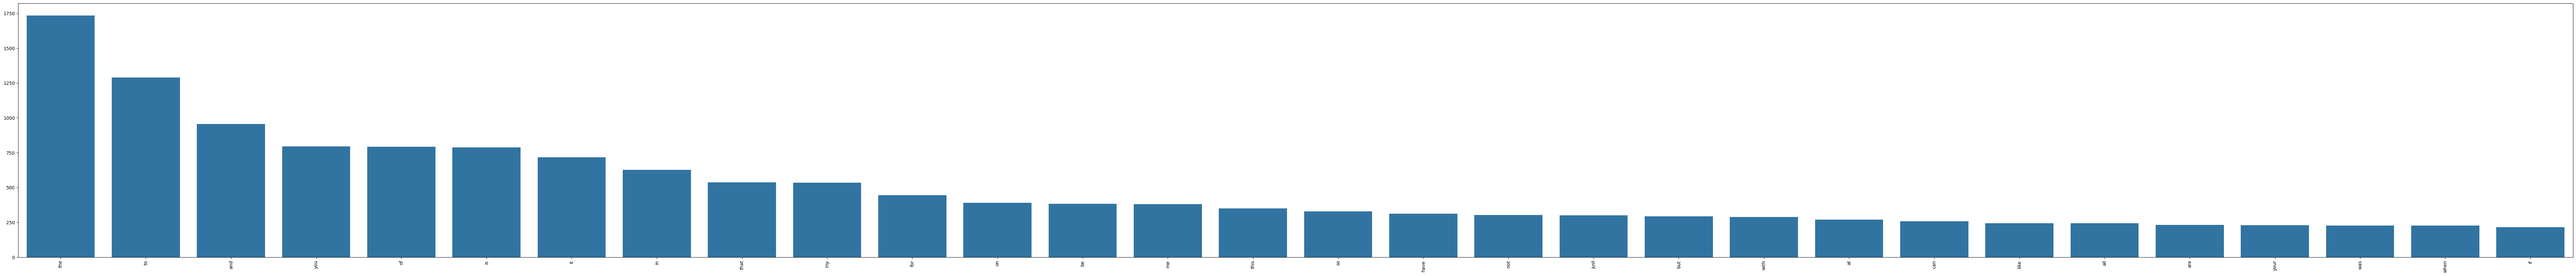

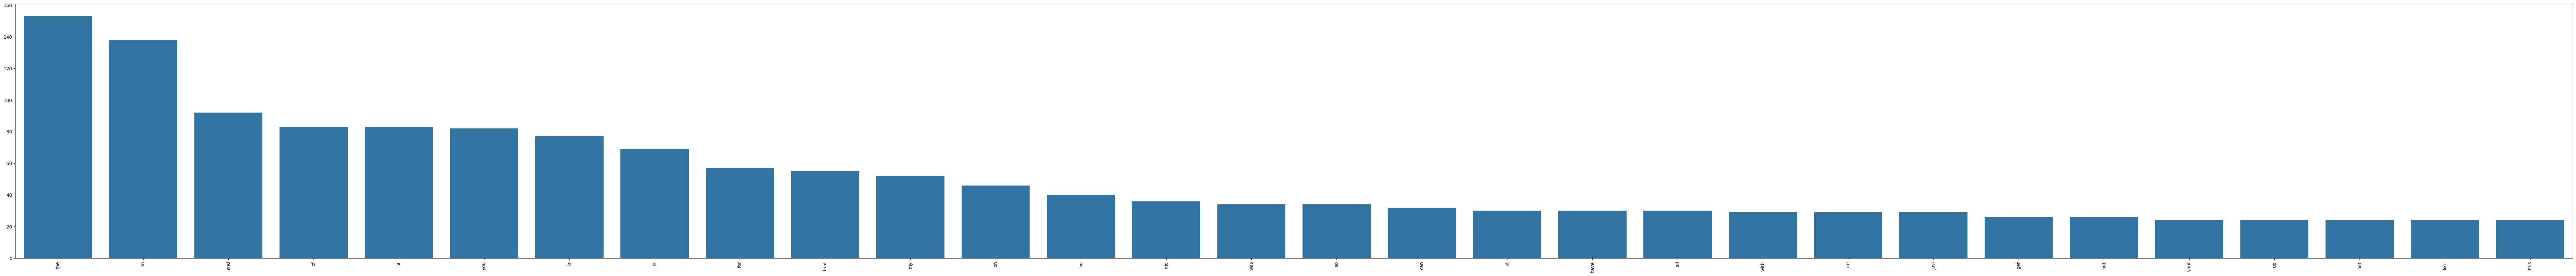

In [ ]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

for df in [train_df, test_df]:
    count_vect = CountVectorizer()
    df_counts = count_vect.fit_transform(df.text)

    term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

    sorted_value = np.argsort(term_frequencies)[::-1]

    plt.subplots(figsize=(100, 10))
    g = sns.barplot(x=count_vect.get_feature_names_out()[sorted_value][:30],
                y=term_frequencies[sorted_value][:30])
    g.set_xticklabels(count_vect.get_feature_names_out()[sorted_value], rotation = 90)

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [29]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=1000)
train_df_tfidf = tfidf_vect.fit_transform(train_df.text)
names = tfidf_vect.get_feature_names_out()

# Convert to dataframe
tfidf_term_document_df = pd.DataFrame(train_df_tfidf.toarray(), columns=names)

print(names[100:110])

['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']


---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

#### Answer here
We can observe the confusion matrix in the figure above, where the x-axis represents the predicted labels, and the y-axis represents the ground truth labels. Thus, the diagonal of the confusion matrix indicates cases where the predicted values match the actual values, i.e., correctly predicted cases. Based on this, we can derive the following results:
* anger
    * Correctly predicted/Total cases: 60/84

* fear
    * Correctly predicted/Total cases: 69/110

* joy
    * Correctly predicted/Total cases: 53/79

* sadness
    * Correctly predicted/Total cases: 47/74


* For ground truth label anger, the misclassified cases are:
    * 11 cases predicted as fear
    * 7 cases predicted as joy
    * 6 cases predicted as sadness

* For ground truth label fear, the misclassified cases are:
    * 20 cases predicted as anger
    * 7 cases predicted as joy
    * 14 cases predicted as sadness

* For ground truth label joy, the misclassified cases are:
    * 6 cases predicted as anger
    * 11 cases predicted as fear
    * 9 cases predicted as sadness

* For ground truth label sadness, the misclassified cases are:
    * 10 cases predicted as anger
    * 12 cases predicted as fear
    * 5 cases predicted as joy


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [37]:
# Answer here
## import package
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

## load Naive Bayes model
nb_classifier = MultinomialNB()
## training
nb_classifier.fit(X_train, y_train)
## testing
y_train_pred = nb_classifier.predict(X_train)
y_test_pred = nb_classifier.predict(X_test)

In [38]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.79
testing accuracy: 0.71


In [39]:
## print result
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Classification Report:
               precision    recall  f1-score   support

       anger       0.65      0.67      0.66        84
        fear       0.74      0.81      0.77       110
         joy       0.77      0.70      0.73        79
     sadness       0.66      0.62      0.64        74

    accuracy                           0.71       347
   macro avg       0.71      0.70      0.70       347
weighted avg       0.71      0.71      0.71       347



In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[56 14  5  9]
 [ 7 89  5  9]
 [11  7 55  6]
 [12 10  6 46]]


In [ ]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

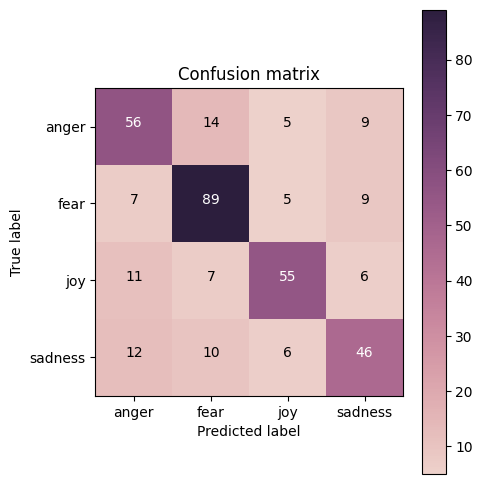

In [42]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

#### Answer here
* Overall, the Decision Tree model achieves a training accuracy of 0.99 and a testing accuracy of 0.68, while the Naive Bayes model achieves a training accuracy of 0.79 and a testing accuracy of 0.71. This indicates that the Naive Bayes model outperforms the Decision Tree model in predictive performance.
* Additionally, the significant gap between the training and testing accuracies of the Decision Tree model suggests a high likelihood of overfitting, a problem not observed in the Naive Bayes model.
* Based on the theory discussed in class, Decision Tree models are highly flexible but are prone to overfitting, particularly when pruning or regularization techniques are not applied.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?!
<table><tr>
    <td><img src="https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic3.png?raw=true" style="width: 300px;"/> </td>
    <td><img src="https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic4.png?raw=true" style="width: 300px;"/> </td>
</tr></table>

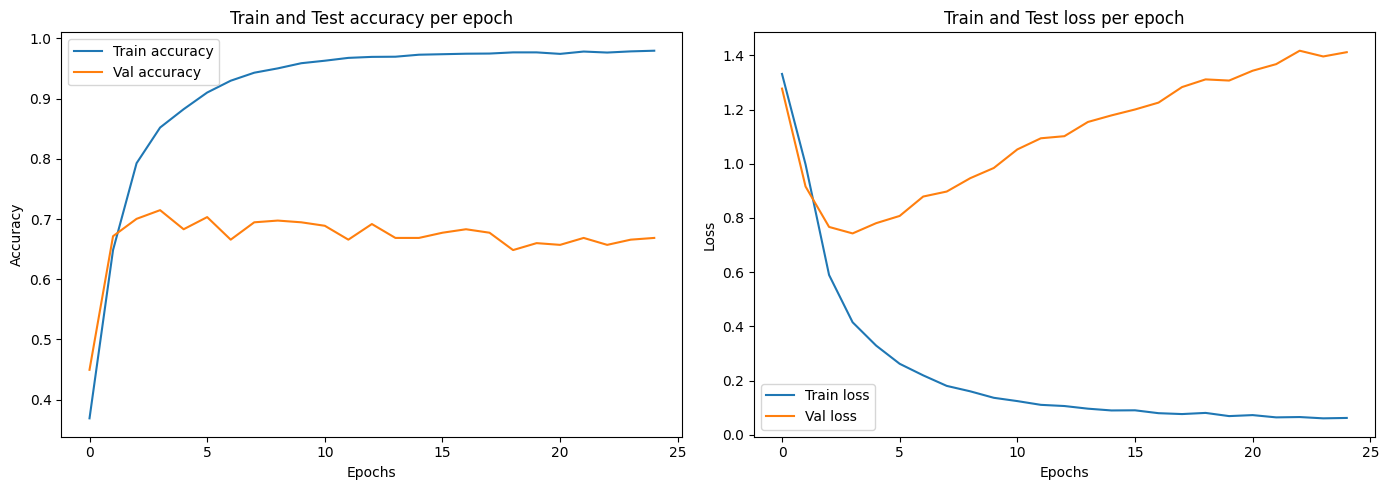

In [ ]:
# Answer here
import matplotlib.pyplot as plt

# create subfigure
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# plot accuracy
axes[0].plot(training_log['epoch'], training_log['accuracy'], label='Train accuracy')
axes[0].plot(training_log['epoch'], training_log['val_accuracy'], label='Val accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Train and Test accuracy per epoch')
axes[0].legend()

# plot loss
axes[1].plot(training_log['epoch'], training_log['loss'], label='Train loss')
axes[1].plot(training_log['epoch'], training_log['val_loss'], label='Val loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].set_title('Train and Test loss per epoch')
axes[1].legend()

# adjust interval
plt.tight_layout()
plt.show()

* In the epoch range of 0-2, both the training and testing loss decrease as the epoch increases, indicating that the model is still underfitting. In the epoch range of 3-24, the training loss continues to decrease while the testing loss starts to increase, suggesting that the model may have entered an overfitting phase, where it is overly tailored to the training data.

---

### ** >>> Exercise 7 (Take home): **
Now, we have the word vectors, but our input data is a sequence of words (or say sentence). How can we utilize these "word" vectors to represent the sentence data and train our model?

### Answer here
* reference
> https://stackoverflow.com/questions/29760935/how-to-get-vector-for-a-sentence-from-the-word2vec-of-tokens-in-sentence
#### There are differet methods to get the sentence vectors :

* Doc2Vec : you can train your dataset using Doc2Vec and then use the sentence vectors.
* Average of Word2Vec vectors : You can just take the average of all the word vectors in a sentence. This average vector will represent your sentence vector.
* Average of Word2Vec vectors with TF-IDF : this is one of the best approach which I will recommend. Just take the word vectors and multiply it with their TF-IDF scores. Just take the average and it will represent your sentence vector.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [ ]:
# Answer here
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

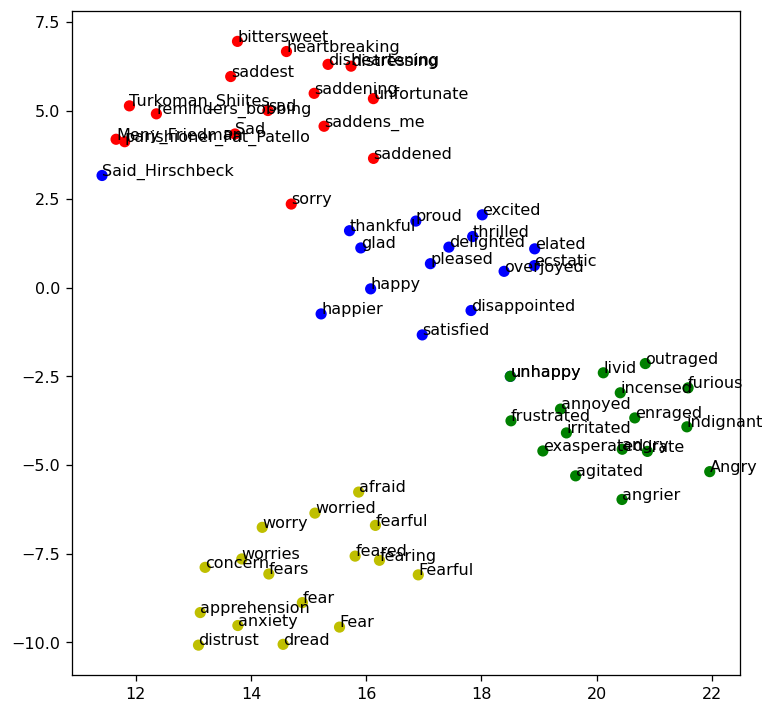

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]
## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

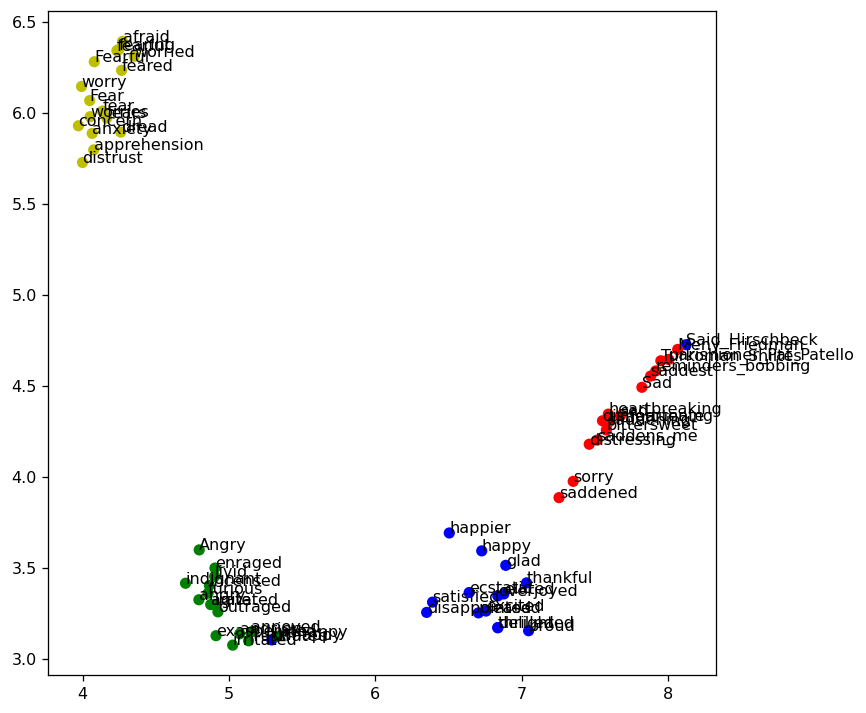

In [122]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


#### Answer here
* The data points in UMAP are relatively more compact compared to t-SNE.
* The word 'unhappy' is positioned between the "happy" and "angry" categories in t-SNE, while UMAP effectively classifies 'unhappy' into the "angry" category. However, the word 'Said_Hirschbeck' is misclassified as part of the "sad" category in both models. Upon investigation, it was found to be a surname, suggesting a potential misunderstanding during the embedding process in word2vec.

---
### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

"role" parameter can be "system", "user", "assistant", or "tool"

In [126]:
# Answer here
response = ollama.chat(
    model='llama3.2',
    messages=[
        {
            'role': 'system',
            'content': 'You are an esports caster.'
        },
        {
            'role': 'system',
            'content': "What is your opinion on Zeus's transfer to another team?"
        },
        {
            'role': 'assistant',
            'content': "Let me analyze the reasons for the player's transfer from multiple perspectives."
        }
    ]
)
display(Markdown(response['message']['content']))

llama_model_loader: loaded meta data with 30 key-value pairs and 255 tensors from /root/.ollama/models/blobs/sha256-dde5aa3fc5ffc17176b5e8bdc82f587b24b2678c6c66101bf7da77af9f7ccdff (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = Llama 3.2 3B Instruct
llama_model_loader: - kv   3:                           general.finetune str              = Instruct
llama_model_loader: - kv   4:                           general.basename str              = Llama-3.2
llama_model_loader: - kv   5:                         general.size_label str              = 3B
llama_model_loader: - kv   6:                               general.tags arr[str,6]   

[GIN] 2024/12/08 - 13:33:12 | 200 |  6.209356344s |       127.0.0.1 | POST     "/api/chat"


 While my primary focus will be on providing a neutral and informed commentary, I'll share some insights based on publicly available information.

Zeus's departure from [Current Team] has generated significant interest among fans and pundits alike. There are various factors that may have contributed to this transfer, including the player's desire for new challenges, differences in playing styles, or perhaps an opportunity to join a more competitive team.

As an esports caster, I believe it's essential to evaluate Zeus's skills and achievements at his previous team. He has consistently demonstrated exceptional gameplay, particularly in [specific game mode]. His ability to adapt to different strategies and teammates was crucial in his success.

The transfer to another team could be seen as a strategic move by Zeus or his representatives to seek better opportunities for growth and development. This might involve exploring new roles, learning from experienced players, or gaining exposure to a more competitive environment.

It's also possible that the reasons behind the transfer are not immediately clear, given the complexities of esports decision-making processes. Agents, managers, and team executives often have to balance various factors, including player happiness, team dynamics, and long-term goals.

Ultimately, Zeus's success will depend on his ability to adjust to a new team environment, learn from his teammates, and continue to develop his skills. As an analyst, I'll be watching his performances closely to gauge the impact of this transfer and assess whether it has elevated or hindered his competitive edge.

That's my take on Zeus's transfer so far. What do you think?

---
### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

In [129]:
# Answer here
response4 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['../input/example-pictures/example.jpg']
    },
])

display(Markdown(response4['message']['content']))

[GIN] 2024/12/08 - 13:33:52 | 200 |  5.378582176s |       127.0.0.1 | POST     "/api/chat"


This image captures a moment of triumph for the Blue Jays, a baseball team. The central figure is Gino Ventrell, their pitcher, who is celebrating his victory with arms raised in joy. He's surrounded by his teammates, all dressed in blue jerseys and white pants, sharing in the exuberance of their win.

In the center of this jubilant group stands a player named C.C., identifiable by his number 21 jersey. He's holding up two gold trophies with both hands, signifying their championship victory. The team is gathered on a baseball field under an open sky, their happiness palpable even in the stillness of the image.

The atmosphere is electric, filled with pride and joy as they celebrate their hard-earned success. This moment encapsulates the thrill of sports - the victory, the camaraderie, and the shared joy of accomplishment. It's a snapshot of a team united in triumph, a testament to their dedication and teamwork.

* The image I selected shows the Chinese Taipei team celebrating their championship victory in the Baseball World Cup, holding up the trophy.
* We can compare this to the description generated by the LLM, which accurately mentions baseball players celebrating their victory.
* However, in terms of details, the "TVBS" logo in the upper left corner was incorrectly recognized as "TV5 RADIUS," indicating that there is still room for improvement in recognizing finer details.

---
### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [ ]:
# Answer here
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url_list):
    whole_docs = []
    for url in url_list:
        loader = WebBaseLoader(
            web_paths=(url,),
            bs_kwargs=dict()
        )
        docs = loader.load() #We will load the URL that will serve as our data source
        text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
        splits = text_splitter.split_documents(docs)
        whole_docs.extend(splits)
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=whole_docs, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url_list = ['https://en.wikipedia.org/wiki/Data_mining','https://en.wikipedia.org/wiki/Cluster_analysis','https://en.wikipedia.org/wiki/Data_and_information_visualization']
# Create the retriever
retriever = load_and_retrieve_docs(url_list)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

question_list = ['What is the core concept of data mining?', 'What are the algorithms used in cluster analysis in computer science?', 'What are the techniques of data visualization?']

# Use the RAG chain
for i,question in enumerate(question_list):
    print(f'Question {i+1} \n {question}\n')
    result = rag_chain(question)
    display(Markdown(result))

[GIN] 2024/12/08 - 13:34:17 | 200 |  150.333922ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 13:34:17 | 200 |   89.299794ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 13:34:17 | 200 |  221.892694ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 13:34:18 | 200 |   91.070809ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 13:34:18 | 200 |  123.217661ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 13:34:18 | 200 |  121.850175ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 13:34:18 | 200 |   46.146244ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 13:34:18 | 200 |    35.33709ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 13:34:18 | 200 |   92.596239ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 13:34:18 | 200 |   79.503007ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 13:34:18 | 

The core concept of data mining is to discover hidden or unexpected patterns, relationships, and insights from large datasets. This process involves extracting useful knowledge or decisions from the data using various algorithms and techniques.

The core concept can also be described as follows:

Data mining is the process of automatically identifying relevant patterns, correlations, and trends in large datasets by exploiting the way data is stored and indexed in databases to execute learning and discovery algorithms more efficiently.

Question 2 
 What are the algorithms used in cluster analysis in computer science?

[GIN] 2024/12/08 - 13:34:48 | 200 |   27.153766ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 13:34:54 | 200 |  5.657935226s |       127.0.0.1 | POST     "/api/chat"


The algorithms used in cluster analysis in computer science are:

1. Single-linkage clustering: This method uses the minimum distance between objects as the linkage criterion.
2. Complete linkage clustering: This method uses the maximum distance between objects as the linkage criterion.
3. UPGMA (Unweighted or Weighted Pair Group Method with Arithmetic Mean) / WPGMA: Also known as average linkage clustering, this method calculates the mean distance of a pair of objects.

Additionally, there are different types of hierarchical clustering:

1. Agglomerative hierarchical clustering: This type starts with single elements and aggregates them into clusters.
2. Divisive hierarchical clustering: This type starts with the complete data set and divides it into partitions.

Some approximate algorithms for cluster analysis include:

1. Lloyd's algorithm (also known as k-means algorithm): This method finds a local optimum and is commonly run multiple times with different random initializations to find better results.
2. Variations of k-means, such as:
	* k-medoids: Restricts centroids to members of the data set.
	* k-medians clustering: Chooses medians instead of centroids.
	* k-means++: Chooses initial centers less randomly.
	* Fuzzy c-means: Allows fuzzy cluster assignment.

These algorithms are often used for large datasets due to their computational efficiency, but may not always find the global optimum.

Question 3 
 What are the techniques of data visualization?

[GIN] 2024/12/08 - 13:34:54 | 200 |   28.210375ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 13:34:57 | 200 |  3.433590875s |       127.0.0.1 | POST     "/api/chat"


The techniques of data visualization include:

1. Tables
2. Charts and graphs:
	* Pie charts
	* Bar charts
	* Line charts
	* Area charts
	* Cone charts
	* Pyramid charts
	* Donut charts
	* Histograms
	* Spectrograms
	* Cohort charts
	* Waterfall charts
	* Funnel charts
	* Bullet graphs
3. Diagrams
4. Plots:
	* Scatter plots
	* Distribution plots
	* Box-and-whisker plots
5. Geospatial maps:
	* Proportional symbol maps
	* Choropleth maps
	* Isopleth maps
	* Heat maps
6. Figures
7. Correlation matrices
8. Percentage gauges

These techniques can be combined in a dashboard to effectively present data.

#### response evaluation
* I asked three types of questions. For the first question, I inquired about the core concept of data mining in the article to test whether the model could correctly understand the meaning of the text. It is evident that the LLM's response focused on the key points. For the second and third questions, I asked about the model's ability to extract the article's outline and summarize methods. The results show that the model was able to effectively capture the structure of the article, demonstrating the LLM's effectiveness in summarization and generalization.
#### RAG advantages
* Efficient Retrieval: RAG combines retrieval and generation capabilities, enabling quick extraction of useful information from large datasets and generating reasonable responses.
#### RAG disadvantages
* Dependence on Data Quality: If the retrieved document content is incomplete or inaccurate, the model may produce incorrect answers.

---
### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

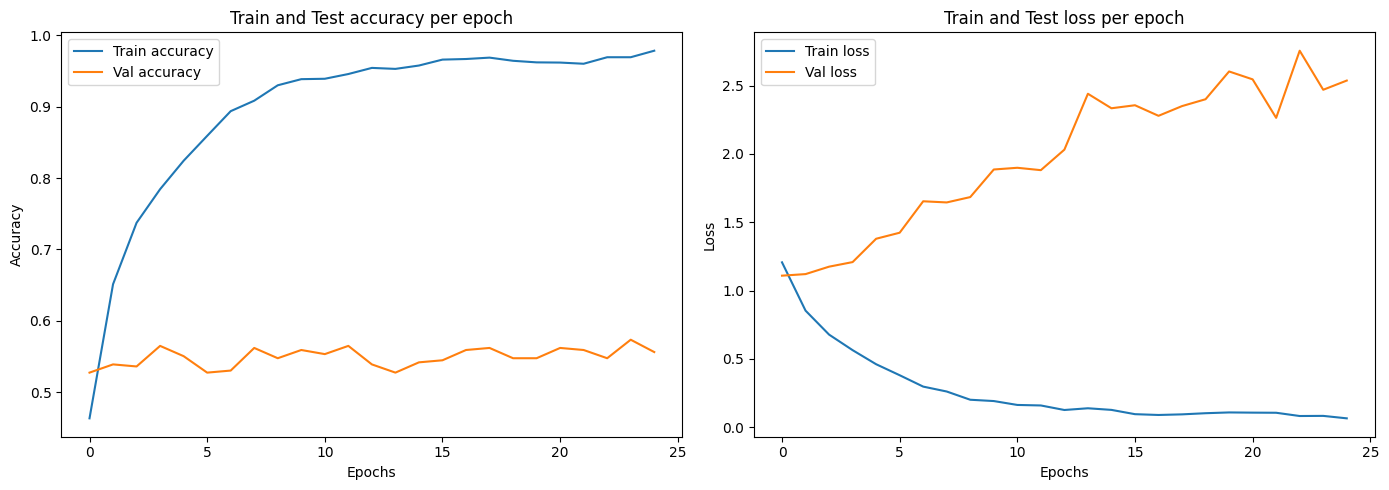

In [ ]:
# Answer here
import matplotlib.pyplot as plt

# create subfigure
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# plot accuracy
axes[0].plot(training_log['epoch'], training_log['accuracy'], label='Train accuracy')
axes[0].plot(training_log['epoch'], training_log['val_accuracy'], label='Val accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Train and Test accuracy per epoch')
axes[0].legend()

# plot loss
axes[1].plot(training_log['epoch'], training_log['loss'], label='Train loss')
axes[1].plot(training_log['epoch'], training_log['val_loss'], label='Val loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].set_title('Train and Test loss per epoch')
axes[1].legend()

# adjust interval
plt.tight_layout()
plt.show()

#### Answer here
* The test accuracy of KNN using LLM embeddings is approximately 0.45, while the test accuracy of NN using LLM embeddings is 0.58. This indicates that NN outperforms KNN in test performance when utilizing LLM embeddings.
* However, a closer look at the loss convergence plot for NN reveals that the validation loss increases as epochs progress, whereas the training loss decreases. This suggests that NN might be overfitting the training data, leading to the observed performance drop.
* In the comparison between BOW and LLM embeddings, it is evident that using BOW yields better accuracy for both KNN and NN models. This could be attributed to the inability of LLM embeddings to effectively capture the contextual relationships within text, potentially introducing more noise and degrading the performance of subsequent models during testing.

---
### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

#### Answer here 
* In the first experimental results, it can be observed that the test accuracy was 0.4375 under the zero-shot setting, 0.5000 under the 1-shot setting, and 0.4625 under the 5-shot setting.
* This indicates that providing examples to the model helps improve prediction accuracy. However, more examples do not necessarily lead to better performance.
* I believe this may be related to the quality of the examples provided. Since the examples were randomly selected in the current setup, poor-quality examples could negatively affect the model's predictions.
  
* In the second experimental results, it can be observed that the test accuracy was 0.4750 under the zero-shot, 1-shot,and 5-shot setting.

*  Large Language Models (LLMs) like LLaMA or GPT often exhibit variability in their outputs, even when provided with the same input prompt.

* In the future, I suggest using a more appropriate approach to select examples. For instance, considering the distribution of each category in the original dataset when selecting examples could help reduce the likelihood of the LLM being biased by the examples, potentially improving prediction performance.